# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")


In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [4]:
X.shape

(70000, 784)

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.shape

(70000,)

In [7]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
X.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [9]:
x0 = X.loc[35999]

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [10]:
import matplotlib.pyplot as plt

In [11]:
X_35999 = np.array(X.loc[35999])

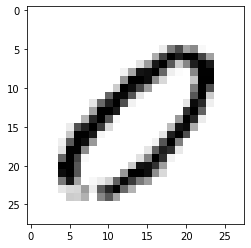

In [12]:
fig, ax = plt.subplots()
ax.imshow(X_35999.reshape(28, 28).T, cmap=plt.cm.binary, interpolation='nearest') 

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [13]:
y.loc[35999]

'0'

It matches the outcome

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [15]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [17]:
y_train_5 = np.where(y_train == '5', 1, 0) 
y_test_5 = np.where(y_test == '5', 1, 0) 

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag', max_iter=10000)
lr.fit(x_train, y_train_5)

LogisticRegression(max_iter=10000, solver='sag')

### Does the classifier predict correctly the 36000th digit we picked before?

In [20]:
X.loc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

In [21]:
predictions = lr.predict(x_train) #because this index is in train set
predictions[35999]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [23]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [24]:
never_5_clf.fit(x_test, y_test_5)

In [25]:
never_5_predictions = never_5_clf.predict(x_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


#Comparison for Logistic Regression
print("Logistic regression")
print(confusion_matrix(y_train_5, predictions))
print(precision_score(y_train_5, predictions))
print(recall_score(y_train_5, predictions))
print(f1_score(y_train_5, predictions))

print('\n\n')
# Comparison for never 5
print("Never 5")
print(confusion_matrix(y_test_5, never_5_predictions))
print(precision_score(y_test_5, never_5_predictions))
print(recall_score(y_test_5, never_5_predictions))
print(f1_score(y_test_5, never_5_predictions))

Logistic regression
[[54155   424]
 [  881  4540]]
0.9145850120870266
0.8374838590665928
0.874337987481945



Never 5
[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

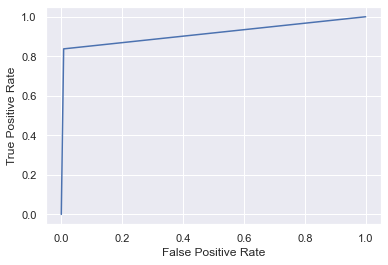

In [28]:
#Graph for logistic regression

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns 

fpr, tpr, thresholds = roc_curve(y_train_5, predictions)

sns.set_theme(style="darkgrid")

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

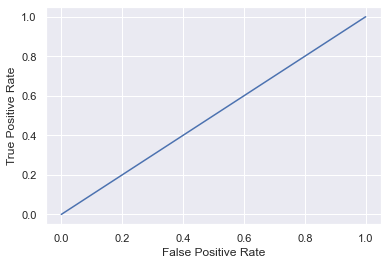

In [29]:
#graph for never 5 classifier

fpr, tpr, thresholds = roc_curve(y_test_5, never_5_predictions)

sns.set_theme(style="darkgrid")

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### Now find the roc_auc_score for each. 

In [35]:
from sklearn.metrics import roc_auc_score

print(f"roc_auc_score for normal predictions : {roc_auc_score(y_train_5, predictions)}")
print(f"roc_auc_score for all but 5 predictions : {roc_auc_score(y_test_5, never_5_predictions)}")

roc_auc_score for normal predictions : 0.9148576516974988
roc_auc_score for all but 5 predictions : 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?